# Perceptron
## Research Question: "Predict whether a stop and search will conclude in police action".

#### In this notebook we attempt to answer the research question using the data set (https://www.kaggle.com/sohier/london-police-records?select=london-stop-and-search.csv). Specifically, we will attempt to answer it by using K-nearest Neighbor to classify the data points on the target ("Outcome" of the stop and search).

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
import util
import util_smote as usm
import numpy as np
import matplotlib.pyplot as plt

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Cleaning the Data set

In [3]:
data = pd.read_csv("data.csv", low_memory = False)

# data = data.dropna()
data = util.data_cleaner(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165651 entries, 0 to 302621
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   Type                       165651 non-null  object             
 1   Date                       165651 non-null  datetime64[ns, UTC]
 2   Latitude                   165651 non-null  float64            
 3   Longitude                  165651 non-null  float64            
 4   Gender                     165651 non-null  object             
 5   Age range                  165651 non-null  object             
 6   Officer-defined ethnicity  165651 non-null  object             
 7   Legislation                165651 non-null  object             
 8   Object of search           165651 non-null  object             
 9   Outcome                    165651 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory 

## Encoding Values

In [4]:
data_encoded, encoders = util.data_encoder(data)
data_encoded.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,6
1,1,0,51.512286,-0.114491,1,1,0,4,8,6
2,1,1,51.512286,-0.114491,1,1,4,4,8,6
4,0,2,51.512286,-0.114491,1,1,4,4,8,6
5,1,3,51.512286,-0.114491,1,1,0,3,3,2


## Split data into train and test

In [5]:
# Split into features and target
target = data_encoded["Outcome"]
features = data_encoded.drop('Outcome', axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

## Train the Perceptron

In [6]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=40)

Training Score: 0.18228191971023242
Testing Score: 0.18188403609912168

 Confusion Matrix


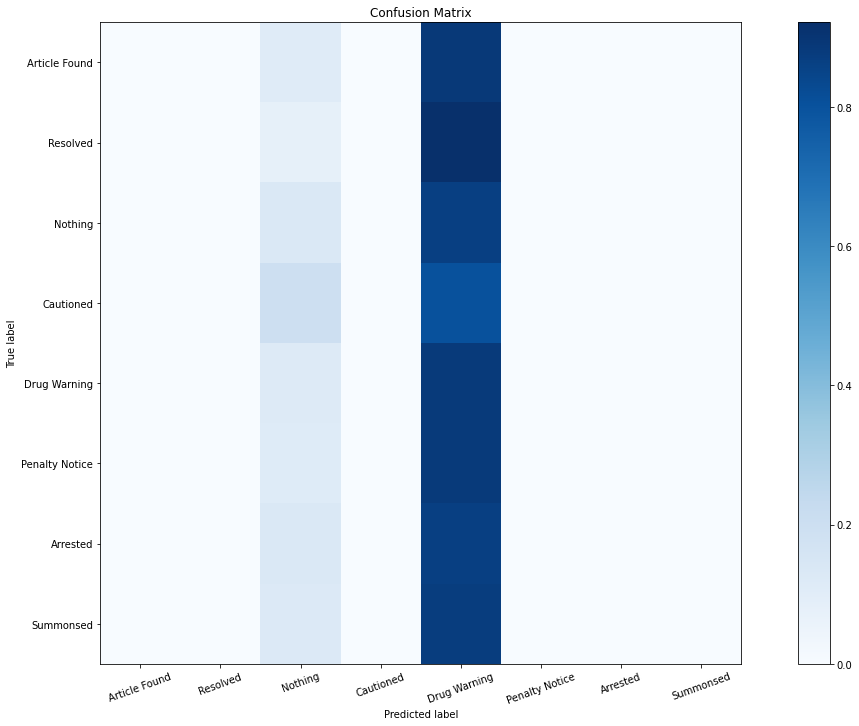

In [7]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

This is a very low score, perhaps increasing the number of iterations over the entire dataset will remove the bias towards predicting Drug Warning.

In [55]:
ppn = Perceptron(max_iter=500,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=500)

Training Score: 0.18228191971023242
Testing Score: 0.18188403609912168

 Confusion Matrix


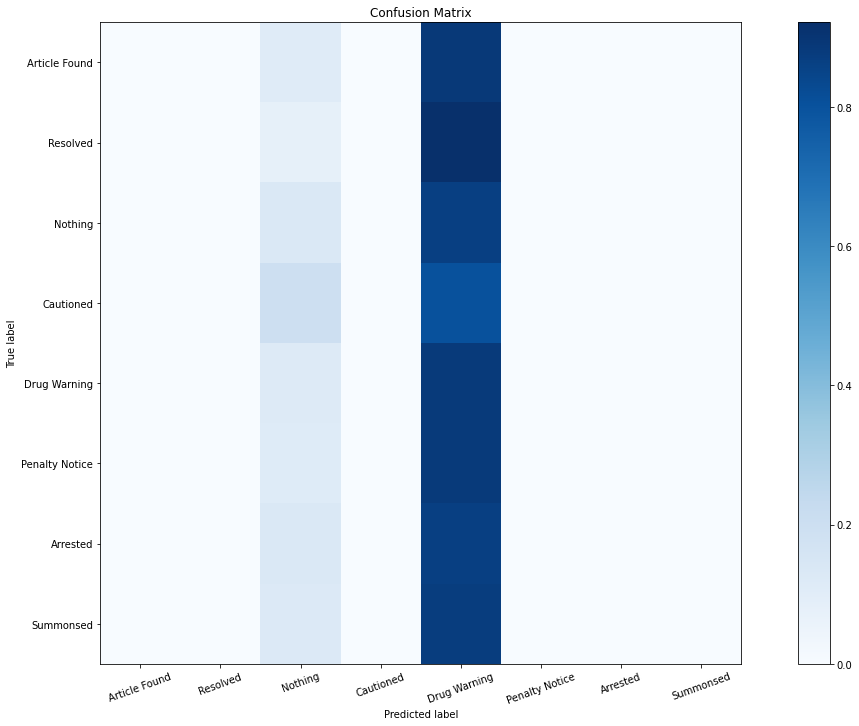

In [19]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

In [17]:
ppn = Perceptron(max_iter=10000,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1)

Training Score: 0.18228191971023242
Testing Score: 0.18188403609912168

 Confusion Matrix


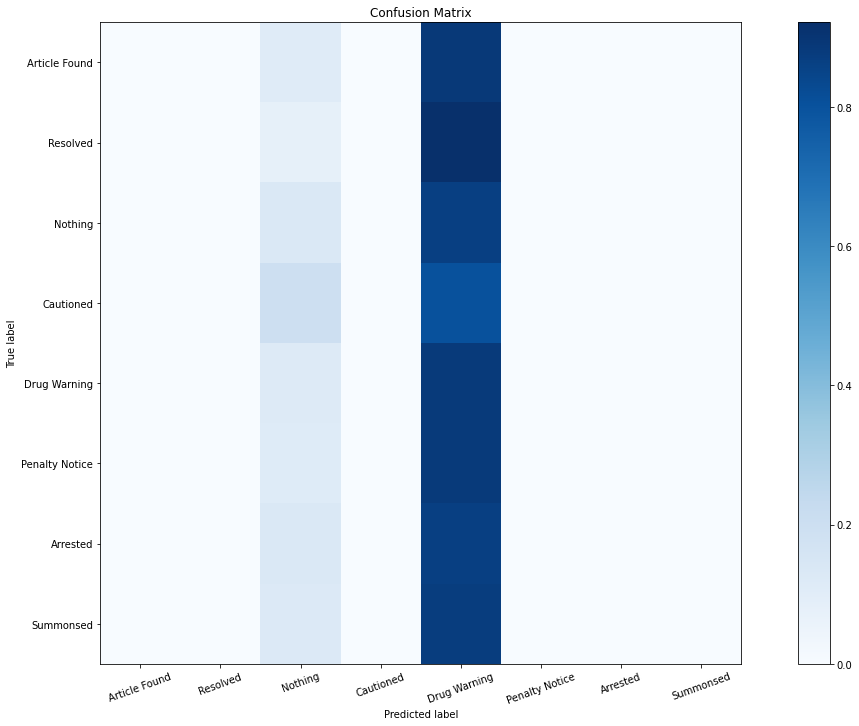

In [18]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

Increasing the number of iterations has no effect on the accuracy score produced, instead I shall tune the learning rate by making it much smaller, as the large learning rate may have caused unstable training.

In [28]:
ppn = Perceptron(max_iter=10000,tol=0.001,eta0=0.0000001)
ppn.fit(X_train, y_train)

Perceptron(eta0=1e-07, max_iter=10000)

Training Score: 0.18228191971023242
Testing Score: 0.18188403609912168

 Confusion Matrix


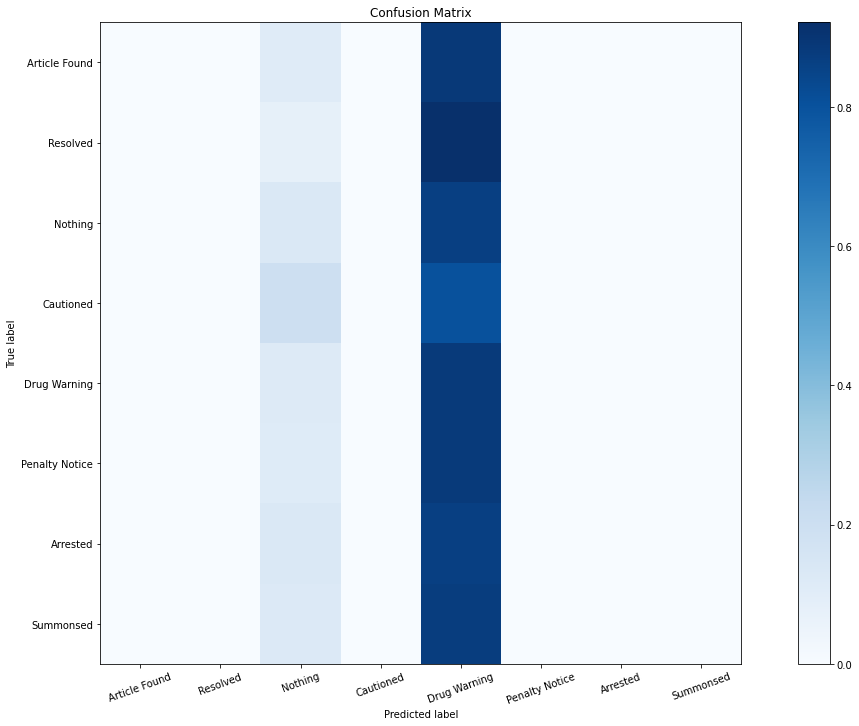

In [29]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

It is clear that tuning the hyperparameters does not have effect on the accuracy score. After fetching the X and Y variables, we will perform preprocessing.

## Split the features in the range 0 - 1

In [31]:
#Min-Max scaling to bring all the features in the range 0 — 1
#https://hackernoon.com/implementing-the-perceptron-algorithm-from-scratch-in-python-48be2d07b1c0

from sklearn.preprocessing import MinMaxScaler
#perform scaling on the data.
X = data_encoded.drop('Outcome', axis=1)
Y = data_encoded["Outcome"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("Outcome",axis = 1).columns)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [37]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, max_iter=40)

Training Score: 0.2189405372773921
Testing Score: 0.21967341764510578

 Confusion Matrix


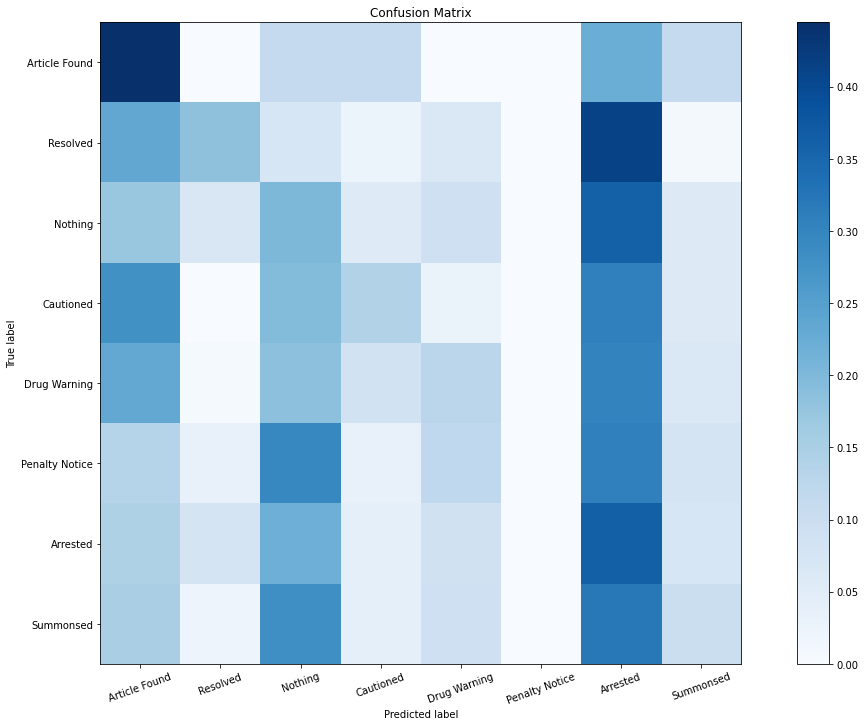

In [38]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

Preprocessing appears to have made the model much less bias towards predicting Drug Warning, however the accuracy score is only marginally better.  Perhaps K Cross Validation will be better for train/test splitting.

## Training Using K-Fold Cross Validation

In [43]:
#Split the data, into a small testing set (test size 0.1), and large training set (that will be passed into K-cross validation)
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(features, target, test_size=0.1, random_state=10)

#Merging X_train and y_train into a single dataframe for K-cross validation utility function
#Merging technique from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [X_train_k, y_train_k]
k_fold_data = pd.concat(frames, axis=1)

#K-cross validation on k_fold_binary_data 
ppn_kfold = Perceptron(max_iter=40,tol=0.001,eta0=1)
util.k_fold_train(model=ppn_kfold, data=k_fold_data)

🚫 WARNING 🚫: this function will take time to process.
 
Fold #1, Training Size: 119268, Validation Size: 29817
Training Score: 0.6539641815071939
Testig Score: 0.6539641815071939


Fold #2, Training Size: 119268, Validation Size: 29817
Training Score: 0.6553392360063052
Testig Score: 0.6553392360063052


Fold #3, Training Size: 119268, Validation Size: 29817
Training Score: 0.653830029848744
Testig Score: 0.653830029848744


Fold #4, Training Size: 119268, Validation Size: 29817
Training Score: 0.6543330985679311
Testig Score: 0.6543330985679311


Fold #5, Training Size: 119268, Validation Size: 29817
Training Score: 0.6547942448938525
Testig Score: 0.6547942448938525




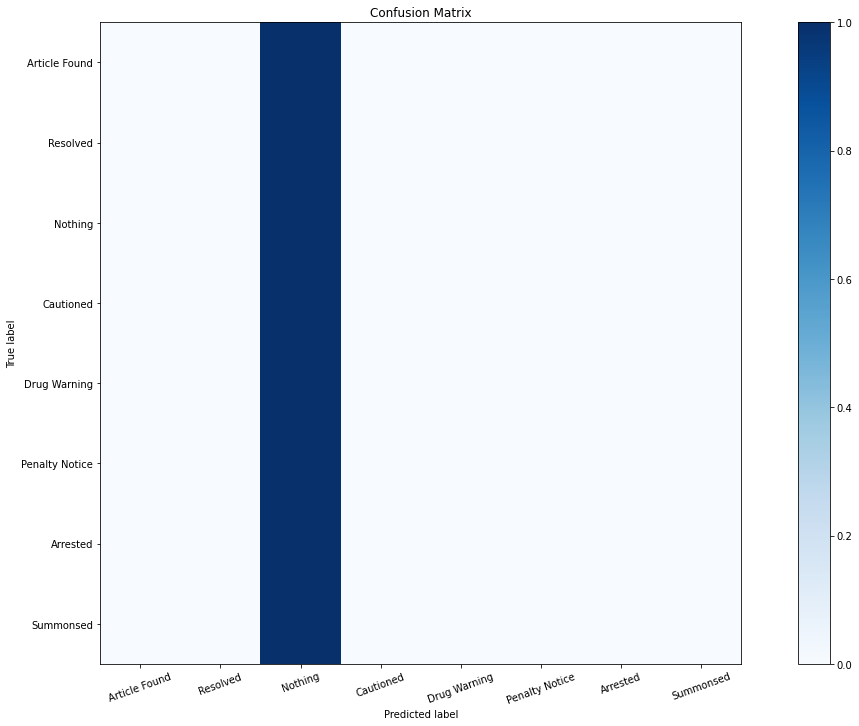

In [10]:
y_predict_k = ppn_kfold.predict(X_test_k)
util.confusion_plot(y_test=y_test_k, y_predictions=y_predict_k)

These results are much better, however upon analysing the confusion matrix there is now significant bias to predicting nothing.

## Split target into "Police Action" (1) and "No Action" (0)
I will try to repeat the above process, but instead of the target being split into eight classes, I split it into two: either there was police action after the stop and search, or there wasn't.

In [11]:
#Replace all values in Outcome column, with 0 if "Nothing found - no further action", else 1.
# Reference for dictionary idea to replace values: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
outcome_splitter = {
    "Nothing found - no further action": 0, 
    "Article found - Detailed outcome unavailable": 1, 
    "Local resolution": 1,
    "Offender cautioned": 1,
    "Offender given drugs possession warning": 1,
    "Offender given penalty notice": 1,
    "Suspect arrested": 1,
    "Suspect summonsed to court": 1
    }
data_binary = data.applymap(lambda s: outcome_splitter.get(s) if s in outcome_splitter else s)
data_binary.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
1,Person search,2015-03-02 16:40:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
2,Person search,2015-03-02 18:45:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
4,Person and Vehicle search,2015-03-03 15:50:00+00:00,51.512286,-0.114491,Male,25-34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,1
5,Person search,2015-03-03 20:20:00+00:00,51.512286,-0.114491,Male,25-34,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,0


In [12]:
data_binary_encoded, encoders_binary = util.data_encoder(data_binary)

print(encoders_binary)
data_binary_encoded.head()

{'Type Encoder': LabelEncoder(), 'Date Encoder': LabelEncoder(), 'Gender Encoder': LabelEncoder(), 'Age range Encoder': LabelEncoder(), 'Officer-defined ethnicity Encoder': LabelEncoder(), 'Legislation Encoder': LabelEncoder(), 'Object of search Encoder': LabelEncoder(), 'Outcome Encoder': LabelEncoder()}


,Type,Date,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome
0,1,0,51.512286,-0.114491,1,1,0,4,8,1
1,1,0,51.512286,-0.114491,1,1,0,4,8,1
2,1,1,51.512286,-0.114491,1,1,4,4,8,1
4,0,2,51.512286,-0.114491,1,1,4,4,8,1
5,1,3,51.512286,-0.114491,1,1,0,3,3,0


In [46]:
# Split into features and target
target_binary = data_binary_encoded["Outcome"]
features_binary = data_binary_encoded.drop('Outcome', axis=1)

#Split the data, into a small testing set (test size 0.1), and large training set (that will be passed into K-cross validation)
X_train_binary_k, X_test_binary_k, y_train_binary_k, y_test_binary_k = train_test_split(features_binary, target_binary, test_size=0.1, random_state=10)

#Merging X_train and y_train into a single dataframe for K-cross validation utility function
#Merging technique from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
frames = [X_train_binary_k, y_train_binary_k]
k_fold_binary_data = pd.concat(frames, axis=1)

#K-cross validation on k_fold_binary_data 
pnn_binary_kfold = Perceptron(max_iter=40,tol=0.001,eta0=1)
util.k_fold_train(model=pnn_binary_kfold, data=k_fold_binary_data)

🚫 WARNING 🚫: this function will take time to process.
 
Fold #1, Training Size: 119268, Validation Size: 29817
Training Score: 0.34668142334909613
Testig Score: 0.34668142334909613


Fold #2, Training Size: 119268, Validation Size: 29817
Training Score: 0.6553392360063052
Testig Score: 0.6553392360063052


Fold #3, Training Size: 119268, Validation Size: 29817
Training Score: 0.653830029848744
Testig Score: 0.653830029848744


Fold #4, Training Size: 119268, Validation Size: 29817
Training Score: 0.6543330985679311
Testig Score: 0.6543330985679311


Fold #5, Training Size: 119268, Validation Size: 29817
Training Score: 0.3453566757219036
Testig Score: 0.3453566757219036




It seems this did not yield better results as Fold #1 and Fold #5 have much lower training and testing scores. 

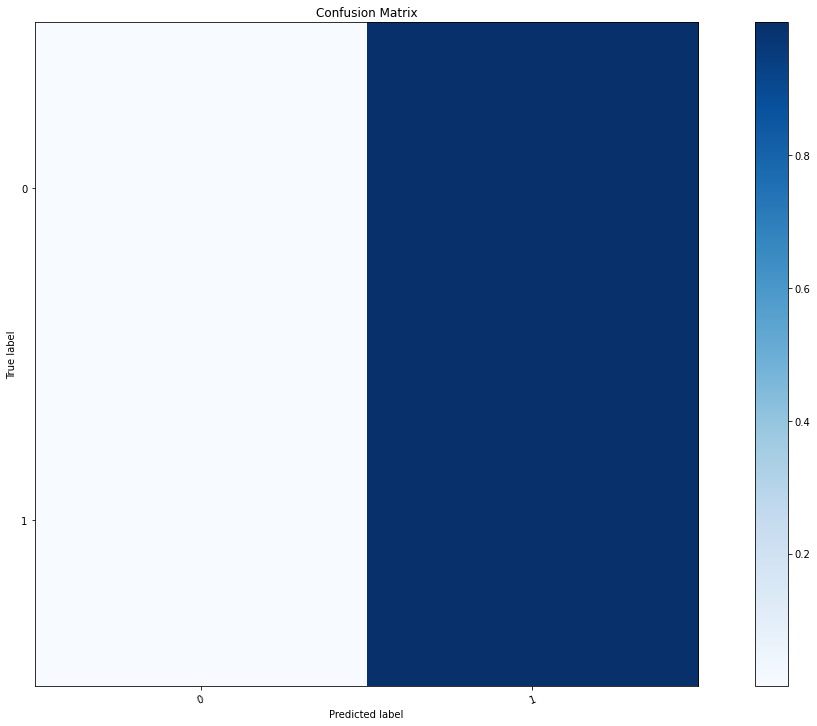

In [14]:
y_predict_binary_k = pnn_binary_kfold.predict(X_test_binary_k)
util.confusion_plot(y_test=y_test_binary_k, y_predictions=y_predict_binary_k, target_classes=[0, 1])

Very biased towards predicting a Police Action outcome.

## Using SMOTE
We use SMOTE to even out the unbalanced dataset

Class 0: 0.02%     (41)
Class 1: 0.68%     (1121)
Class 2: 65.41%     (108353)
Class 3: 0.1%     (167)
Class 4: 10.74%     (17788)
Class 5: 2.31%     (3824)
Class 6: 19.96%     (33067)
Class 7: 0.78%     (1290)
Total: 165651


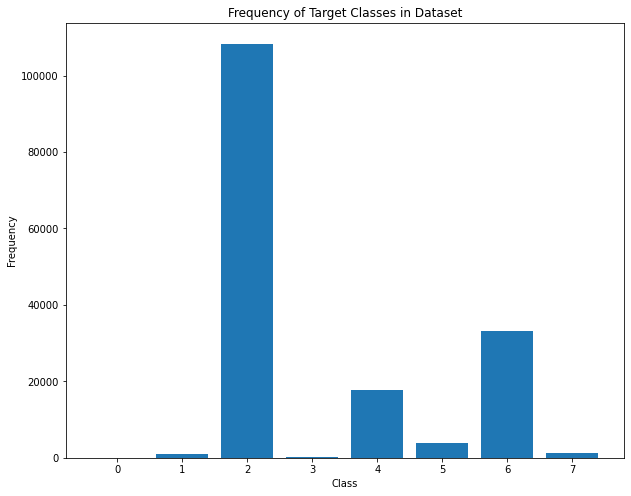

In [53]:
usm.display_frequencies(data_encoded["Outcome"])

Class 0: 12.5%     (86784)
Class 1: 12.5%     (86784)
Class 2: 12.5%     (86784)
Class 3: 12.5%     (86784)
Class 4: 12.5%     (86784)
Class 5: 12.5%     (86784)
Class 6: 12.5%     (86784)
Class 7: 12.5%     (86784)
Total: 694272


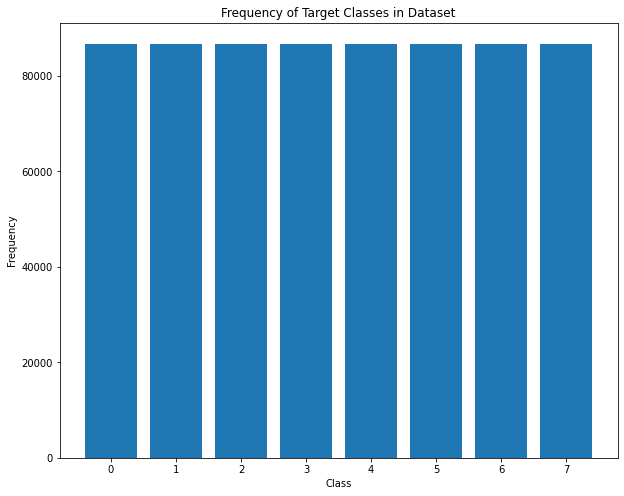

In [54]:
X_smote, y_smote = usm.smote_data(X_train, y_train)
usm.display_frequencies(y_smote)

In [67]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_smote, y_smote)

Perceptron(eta0=1, max_iter=40)

Training Score: 0.5360322970117718
Testing Score: 0.5353294497600435

 Confusion Matrix


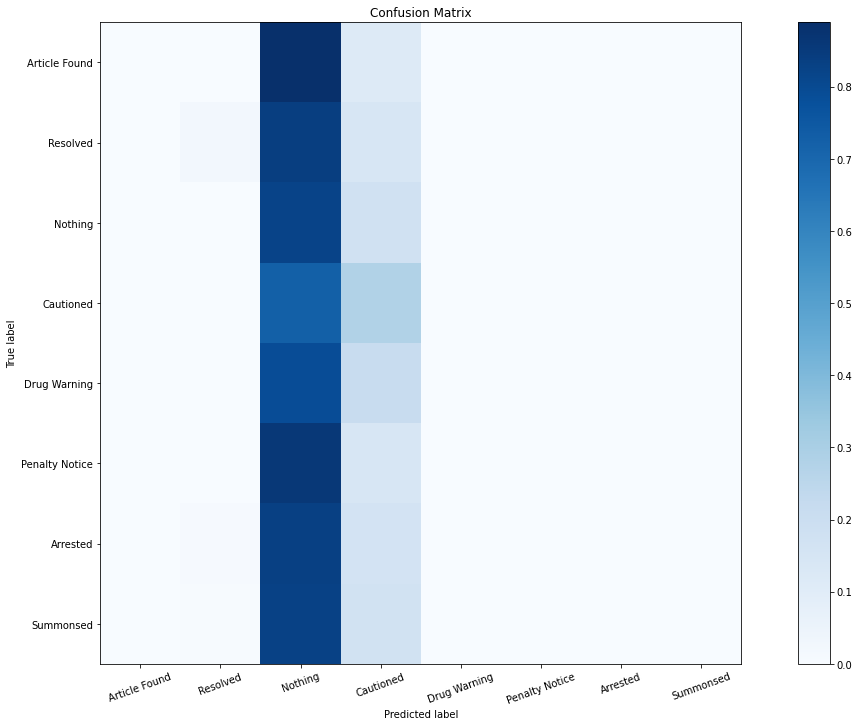

In [68]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)

## Using Biased SMOTE
We over sample minority classes, but not to an extent that equalizes them to the majority class

Class 0: 7.76%     (30000)
Class 1: 7.76%     (30000)
Class 2: 22.44%     (86784)
Class 3: 7.76%     (30000)
Class 4: 15.51%     (60000)
Class 5: 12.93%     (50000)
Class 6: 18.1%     (70000)
Class 7: 7.76%     (30000)
Total: 386784


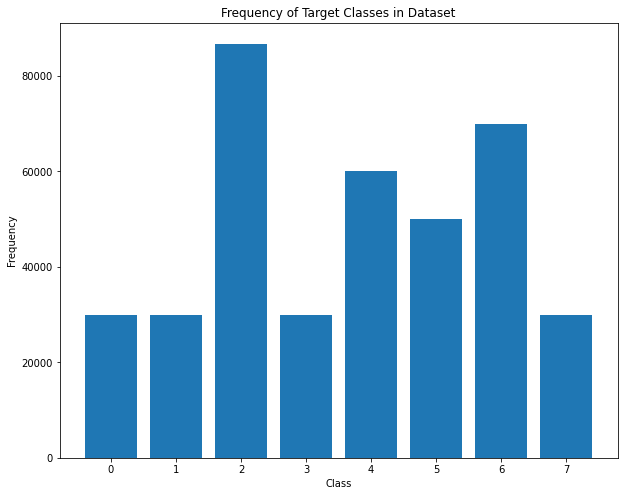

In [60]:
sampling_strategy = {0:30000, 1:30000, 2:86784, 3:30000, 4:60000, 5:50000, 6:70000, 7:30000}
X_smote, y_smote = usm.smote_data(X_train, y_train, sampling_strategy=sampling_strategy)
usm.display_frequencies(y_smote)

In [69]:
ppn = Perceptron(max_iter=40,tol=0.001,eta0=1)
ppn.fit(X_smote, y_smote)

Perceptron(eta0=1, max_iter=40)

Training Score: 0.5360322970117718
Testing Score: 0.5353294497600435

 Confusion Matrix


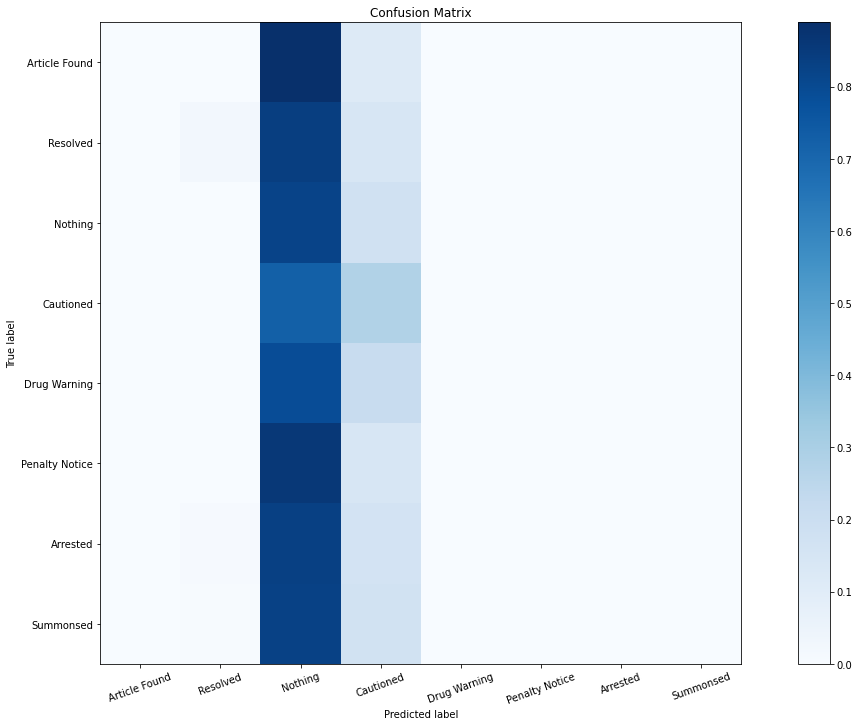

In [70]:
print(f"Training Score: {ppn.score(X_train, y_train)}")
print(f"Testing Score: {ppn.score(X_test, y_test)}")
print("\n Confusion Matrix")
y_predictions = ppn.predict(X_test)
util.confusion_plot(y_test=y_test, y_predictions=y_predictions)